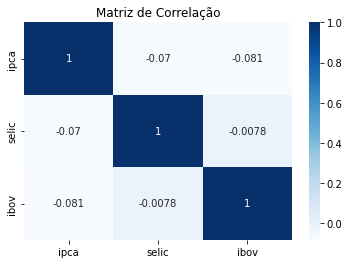

---------------------------------------------------------------------------
OSError                                   Traceback (most recent call last)
File <command-2953014111556243>:15
     12 plt.title("Matriz de Correlação")
     13 plt.show()
---> 15 df_gold.to_csv("/dbfs/mnt/gold/economia_correlacao.csv", index=False)

File /databricks/python/lib/python3.9/site-packages/pandas/core/generic.py:3551, in NDFrame.to_csv(self, path_or_buf, sep, na_rep, float_format, columns, header, index, index_label, mode, encoding, compression, quoting, quotechar, line_terminator, chunksize, date_format, doublequote, escapechar, decimal, errors, storage_options)
   3540 df = self if isinstance(self, ABCDataFrame) else self.to_frame()
   3542 formatter = DataFrameFormatter(
   3543     frame=df,
   3544     header=header,
   (...)
   3548     decimal=decimal,
   3549 )
-> 3551 return DataFrameRenderer(formatter).to_csv(
   3552     path_or_buf,
   3553     line_terminator=line_terminator,
   3554   

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")
df_gold = df_silver.toPandas()
df_gold = df_gold.sort_values("data")

correlacao = df_gold[["ipca", "selic", "ibov"]].corr()

sns.heatmap(correlacao, annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()

df_gold.to_csv("/dbfs/mnt/gold/economia_correlacao.csv", index=False)


In [0]:
df_gold.to_csv("/tmp/economia_correlacao.csv", index=False)


In [0]:
df_gold.to_csv("/tmp/economia_correlacao.csv", index=False)
dbutils.fs.cp("file:/tmp/economia_correlacao.csv", "dbfs:/FileStore/economia_correlacao.csv")


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df = spark.read.parquet("/mnt/silver/economia_brasileira").toPandas()
df = df.sort_values("data")

plt.figure(figsize=(10, 4))
plt.plot(df["data"], df["ipca"], label="IPCA")
plt.plot(df["data"], df["selic"], label="SELIC")
plt.title("Evolução IPCA e SELIC (2009-2024)")
plt.xlabel("Data")
plt.ylabel("Percentual (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [0]:
plt.figure(figsize=(10, 4))
plt.plot(df["data"], df["ibov"], label="IBOVESPA", color="green")
plt.title("Evolução IBOVESPA (2009-2024)")
plt.xlabel("Data")
plt.ylabel("Pontos")
plt.grid(True)
plt.tight_layout()
plt.show()


In [0]:
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.regplot(data=df, x="selic", y="ibov", line_kws={"color": "red"})
plt.title("SELIC vs IBOVESPA")
plt.tight_layout()
plt.show()


In [0]:
%sql
-- Mostrar total de registros
SELECT COUNT(*) FROM silver_economia;

-- Ver média de cada indicador
SELECT AVG(ipca), AVG(selic), AVG(ibov) FROM silver_economia;

-- Ver dados do ano mais recente
SELECT * FROM silver_economia WHERE YEAR(data) = 2024;


In [0]:
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")
df_silver.createOrReplaceTempView("silver_economia")


In [0]:
%sql
SELECT COUNT(*) FROM silver_economia


In [0]:
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")
df_silver.createOrReplaceTempView("silver_economia")


In [0]:
%sql
SELECT COUNT(*) FROM silver_economia;


In [0]:
%sql
SELECT AVG(ipca), AVG(selic), AVG(ibov) FROM silver_economia;


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
%sql
%%sql

-- Criar banco de dados (opcional)
CREATE DATABASE IF NOT EXISTS mvp_economia;
USE mvp_economia;

-- Criar tabela dimensão tempo
CREATE TABLE IF NOT EXISTS dim_tempo (
  data_id INT,
  data DATE,
  ano INT,
  mes INT
);

-- Outras tabelas...


In [0]:
spark.sql("""
CREATE TABLE IF NOT EXISTS dim_tempo (
  data_id INT,
  data DATE,
  ano INT,
  mes INT
)
""")


In [0]:
%sql
CREATE DATABASE IF NOT EXISTS mvp_economia;
USE mvp_economia;

CREATE TABLE IF NOT EXISTS dim_tempo (
  data_id INT,
  data DATE,
  ano INT,
  mes INT
);

CREATE TABLE IF NOT EXISTS dim_ipca (
  ipca_id INT,
  ipca_valor FLOAT
);

CREATE TABLE IF NOT EXISTS dim_selic (
  selic_id INT,
  selic_valor FLOAT
);

CREATE TABLE IF NOT EXISTS dim_ibov (
  ibov_id INT,
  ibov_valor INT
);

CREATE TABLE IF NOT EXISTS fato_economia (
  data_id INT,
  ipca_id INT,
  selic_id INT,
  ibov_id INT
);


In [0]:
%sql
USE mvp_economia;

-- Populando dimensões
INSERT INTO dim_tempo VALUES (1, '2024-12-01', 2024, 12);
INSERT INTO dim_ipca VALUES (1, 0.47);
INSERT INTO dim_selic VALUES (1, 11.75);
INSERT INTO dim_ibov VALUES (1, 130800);

-- Populando fato
INSERT INTO fato_economia VALUES (1, 1, 1, 1);


In [0]:
%sql
SELECT 
  t.data,
  t.ano,
  t.mes,
  i.ipca_valor,
  s.selic_valor,
  b.ibov_valor
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ipca i ON f.ipca_id = i.ipca_id
JOIN dim_selic s ON f.selic_id = s.selic_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id;


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacao = df_gold[["ipca", "selic", "ibov"]].corr()
sns.heatmap(correlacao, annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.show()


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leitura dos dados da camada Silver
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")

# Conversão para Pandas e ordenação
df_gold = df_gold.toPandas()
df_gold = df_gold.sort_values("data")

# Matriz de correlação
correlacao = df_gold[["ipca", "selic", "ibov"]].corr()

# Plot do gráfico de calor
sns.heatmap(correlacao, annot=True, cmap="Blues")
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()


In [0]:
display(dbutils.fs.ls("dbfs:/mnt/gold/"))


In [0]:
df_gold.write.mode("overwrite").format("parquet").save("/mnt/gold/economia_correlacao")


In [0]:
from pyspark.sql.functions import row_number, col, date_format, year, month
from pyspark.sql.window import Window

# Leitura da camada Silver
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")

# Janela para ordenação por data
window_spec = Window.orderBy("data")

# Tabelas dimensão com ID numérico
df_ipca = df_silver.select("data", "ipca").distinct().withColumnRenamed("ipca", "ipca_valor")
df_ipca = df_ipca.withColumn("ipca_id", row_number().over(window_spec)).select("ipca_id", "ipca_valor")

df_selic = df_silver.select("data", "selic").distinct().withColumnRenamed("selic", "selic_valor")
df_selic = df_selic.withColumn("selic_id", row_number().over(window_spec)).select("selic_id", "selic_valor")

df_ibov = df_silver.select("data", "ibov").distinct().withColumnRenamed("ibov", "ibov_valor")
df_ibov = df_ibov.withColumn("ibov_id", row_number().over(window_spec)).select("ibov_id", "ibov_valor")

# Dimensão tempo com ID numérico
df_tempo = df_silver.select("data").distinct()
df_tempo = df_tempo.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))
df_tempo = df_tempo.withColumn("ano", year("data")).withColumn("mes", month("data"))
df_tempo = df_tempo.select("data_id", "data", "ano", "mes")

# Criar fato_economia com os IDs numéricos
df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))

df_fato = df_base \
    .join(df_ipca.withColumn("data", df_silver["data"]), on="data") \
    .join(df_selic.withColumn("data", df_silver["data"]), on="data") \
    .join(df_ibov.withColumn("data", df_silver["data"]), on="data") \
    .select("data_id", "ipca_id", "selic_id", "ibov_id").distinct()

# Salvar como tabela no Databricks
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
from pyspark.sql.functions import row_number, col, date_format, year, month
from pyspark.sql.window import Window

# Leitura da camada Silver
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")

# Janela para ordenação por data
window_spec = Window.orderBy("data")

# Tabelas dimensão com a coluna "data"
df_ipca = df_silver.select("data", "ipca").distinct().withColumnRenamed("ipca", "ipca_valor")
df_ipca = df_ipca.withColumn("ipca_id", row_number().over(window_spec))

df_selic = df_silver.select("data", "selic").distinct().withColumnRenamed("selic", "selic_valor")
df_selic = df_selic.withColumn("selic_id", row_number().over(window_spec))

df_ibov = df_silver.select("data", "ibov").distinct().withColumnRenamed("ibov", "ibov_valor")
df_ibov = df_ibov.withColumn("ibov_id", row_number().over(window_spec))

# Dimensão tempo com ID numérico
df_tempo = df_silver.select("data").distinct()
df_tempo = df_tempo.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))


In [0]:
# Base com data_id numérico
df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))

# Criar tabela fato com joins e apenas os IDs
df_fato = df_base \
    .join(df_ipca, on="data", how="inner") \
    .join(df_selic, on="data", how="inner") \
    .join(df_ibov, on="data", how="inner") \
    .select("data_id", "ipca_id", "selic_id", "ibov_id") \
    .distinct()

# Salvar como tabela SQL no Databricks
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
%sql
DROP TABLE IF EXISTS fato_economia;



In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/fato_economia", True)
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

window_spec = Window.orderBy("data")

df_ipca = df_silver.select("data", "ipca").distinct() \
    .withColumnRenamed("ipca", "ipca_valor") \
    .withColumn("ipca_id", row_number().over(window_spec))

df_selic = df_silver.select("data", "selic").distinct() \
    .withColumnRenamed("selic", "selic_valor") \
    .withColumn("selic_id", row_number().over(window_spec))

df_ibov = df_silver.select("data", "ibov").distinct() \
    .withColumnRenamed("ibov", "ibov_valor") \
    .withColumn("ibov_id", row_number().over(window_spec))


In [0]:
df_ipca.select("ipca_id", "ipca_valor").write.mode("overwrite").saveAsTable("dim_ipca")
df_selic.select("selic_id", "selic_valor").write.mode("overwrite").saveAsTable("dim_selic")
df_ibov.select("ibov_id", "ibov_valor").write.mode("overwrite").saveAsTable("dim_ibov")


In [0]:
# IPCA
df_ipca.select("ipca_id", "ipca_valor").write.mode("overwrite").saveAsTable("dim_ipca")

# SELIC
df_selic.select("selic_id", "selic_valor").write.mode("overwrite").saveAsTable("dim_selic")

# IBOVESPA
df_ibov.select("ibov_id", "ibov_valor").write.mode("overwrite").saveAsTable("dim_ibov")


In [0]:
# IPCA
df_ipca.select("ipca_id", "ipca_valor").write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("dim_ipca")

# SELIC
df_selic.select("selic_id", "selic_valor").write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("dim_selic")

# IBOVESPA
df_ibov.select("ibov_id", "ibov_valor").write \
    .format("delta") \
    .mode("overwrite") \
    .option("overwriteSchema", "true") \
    .saveAsTable("dim_ibov")


In [0]:
%sql
SELECT * FROM dim_ipca LIMIT 10;


In [0]:
%sql
SELECT 
  f.data_id,
  t.ano,
  t.mes,
  i.ipca_valor,
  s.selic_valor,
  b.ibov_valor
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ipca i ON f.ipca_id = i.ipca_id
JOIN dim_selic s ON f.selic_id = s.selic_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id
LIMIT 20;


In [0]:
df_final = spark.sql("""
SELECT
  f.data_id,
  t.ano,
  t.mes,
  i.ipca_valor,
  s.selic_valor,
  b.ibov_valor
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ipca i ON f.ipca_id = i.ipca_id
JOIN dim_selic s ON f.selic_id = s.selic_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id
ORDER BY f.data_id
""")

df_final.write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_ipca_selic_ibov.csv")


In [0]:
spark.sql("SHOW TABLES").show()


In [0]:
spark.sql("SHOW TABLES").show()


In [0]:
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
df_fato = df_base \
    .join(df_ipca, on="data", how="inner") \
    .join(df_selic, on="data", how="inner") \
    .join(df_ibov, on="data", how="inner") \
    .select("data_id", "ipca_id", "selic_id", "ibov_id") \
    .distinct()


In [0]:
from pyspark.sql.functions import date_format

df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))


In [0]:
from pyspark.sql.functions import date_format

df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))


In [0]:
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")


In [0]:
from pyspark.sql.functions import date_format

df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))

df_fato = df_base \
    .join(df_ipca, on="data", how="inner") \
    .join(df_selic, on="data", how="inner") \
    .join(df_ibov, on="data", how="inner") \
    .select("data_id", "ipca_id", "selic_id", "ibov_id") \
    .distinct()

df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
from pyspark.sql.functions import row_number, col
from pyspark.sql.window import Window

# Releitura do silver (caso ainda não tenha feito)
df_silver = spark.read.parquet("/mnt/silver/economia_brasileira")

# Especificação da ordenação por data
window_spec = Window.orderBy("data")

# df_ipca
df_ipca = df_silver.select("data", "ipca").distinct() \
    .withColumnRenamed("ipca", "ipca_valor") \
    .withColumn("ipca_id", row_number().over(window_spec))

# df_selic
df_selic = df_silver.select("data", "selic").distinct() \
    .withColumnRenamed("selic", "selic_valor") \
    .withColumn("selic_id", row_number().over(window_spec))

# df_ibov
df_ibov = df_silver.select("data", "ibov").distinct() \
    .withColumnRenamed("ibov", "ibov_valor") \
    .withColumn("ibov_id", row_number().over(window_spec))


In [0]:
from pyspark.sql.functions import date_format

df_base = df_silver.withColumn("data_id", date_format("data", "yyyyMMdd").cast("int"))

df_fato = df_base \
    .join(df_ipca, on="data", how="inner") \
    .join(df_selic, on="data", how="inner") \
    .join(df_ibov, on="data", how="inner") \
    .select("data_id", "ipca_id", "selic_id", "ibov_id") \
    .distinct()


In [0]:
df_fato.write.mode("overwrite").saveAsTable("fato_economia")


In [0]:
from pyspark.sql.functions import year, month, date_format


In [0]:
spark.sql("DROP TABLE IF EXISTS dim_tempo")


In [0]:
dbutils.fs.rm("dbfs:/user/hive/warehouse/dim_tempo", True)


In [0]:
from pyspark.sql.functions import year, month, date_format

df_tempo = df_silver.select("data").distinct() \
    .withColumn("data_id", date_format("data", "yyyyMMdd").cast("int")) \
    .withColumn("ano", year("data")) \
    .withColumn("mes", month("data"))

df_tempo.write.mode("overwrite").saveAsTable("dim_tempo")


In [0]:
%sql
SELECT 
  t.ano,
  ROUND(AVG(i.ipca_valor), 2) AS media_ipca,
  ROUND(AVG(s.selic_valor), 2) AS media_selic,
  ROUND(AVG(b.ibov_valor), 2) AS media_ibov
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ipca i ON f.ipca_id = i.ipca_id
JOIN dim_selic s ON f.selic_id = s.selic_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id
GROUP BY t.ano
ORDER BY t.ano;


In [0]:
%sql
SELECT 
  t.ano,
  t.mes,
  SUM(i.ipca_valor) AS soma_ipca,
  SUM(s.selic_valor) AS soma_selic,
  SUM(b.ibov_valor) AS soma_ibov
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ipca i ON f.ipca_id = i.ipca_id
JOIN dim_selic s ON f.selic_id = s.selic_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id
GROUP BY t.ano, t.mes
ORDER BY t.ano, t.mes;


In [0]:
%sql
SELECT 
  t.ano,
  ROUND(AVG(s.selic_valor), 2) AS media_selic
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_selic s ON f.selic_id = s.selic_id
GROUP BY t.ano
ORDER BY media_selic DESC
LIMIT 1;


In [0]:
%sql
SELECT 
  t.ano,
  MAX(b.ibov_valor) - MIN(b.ibov_valor) AS variacao_ibov
FROM fato_economia f
JOIN dim_tempo t ON f.data_id = t.data_id
JOIN dim_ibov b ON f.ibov_id = b.ibov_id
GROUP BY t.ano
ORDER BY variacao_ibov DESC;


In [0]:
df_silver.write.mode("overwrite").saveAsTable("gold_economia")


In [0]:
df_gold = spark.table("gold_economia")


In [0]:
df_gold.write.mode("overwrite").saveAsTable("gold_economia")


In [0]:
df_gold = spark.table("gold_economia")


In [0]:
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")

df_gold.write.mode("overwrite").saveAsTable("gold_economia")


In [0]:
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")


In [0]:
df_gold = spark.table("gold_economia")


In [0]:
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")


In [0]:
df_gold = spark.read.table("economia_brasileira")


---------------------------------------------------------------------------
AnalysisException                         Traceback (most recent call last)
File <command-1861970413565582>:1
----> 1 df_gold = spark.read.table("economia_brasileira")

File /databricks/spark/python/pyspark/instrumentation_utils.py:48, in _wrap_function.<locals>.wrapper(*args, **kwargs)
     46 start = time.perf_counter()
     47 try:
---> 48     res = func(*args, **kwargs)
     49     logger.log_success(
     50         module_name, class_name, function_name, time.perf_counter() - start, signature
     51     )
     52     return res

File /databricks/spark/python/pyspark/sql/readwriter.py:473, in DataFrameReader.table(self, tableName)
    439 def table(self, tableName: str) -> "DataFrame":
    440     """Returns the specified table as a :class:`DataFrame`.
    441 
    442     .. versionadded:: 1.4.0
   (...)
    471     >>> _ = spark.sql("DROP TABLE tblA")
    472     """
--> 473     return self._df(self._jr

In [0]:
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")
df_gold.write.mode("overwrite").saveAsTable("economia_brasileira")


In [0]:
df_gold = spark.read.table("economia_brasileira")


In [0]:
df_gold = spark.read.parquet("/mnt/silver/economia_brasileira")

df_gold.write.mode("overwrite").saveAsTable("economia_brasileira")


In [0]:
df_gold = spark.read.table("economia_brasileira")


In [0]:
df_gold = spark.read.table("economia_brasileira")


In [0]:
df_gold = spark.read.table("economia_brasileira")

df_gold.write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia.csv")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/"))


path,name,size,modificationTime
dbfs:/FileStore/tables/IPCA.csv,IPCA.csv,3061,1743529759000
dbfs:/FileStore/tables/gold_ipca_selic_ibov-1.csv,gold_ipca_selic_ibov-1.csv,7131,1743523237000
dbfs:/FileStore/tables/gold_ipca_selic_ibov-2.csv,gold_ipca_selic_ibov-2.csv,7131,1743525005000
dbfs:/FileStore/tables/gold_ipca_selic_ibov.csv,gold_ipca_selic_ibov.csv,7131,1743521604000
dbfs:/FileStore/tables/ibov.csv,ibov.csv,3277,1743529759000
dbfs:/FileStore/tables/ibov_mvp_15_anos-1.csv,ibov_mvp_15_anos-1.csv,5323,1743527003000
dbfs:/FileStore/tables/ibov_mvp_15_anos.csv,ibov_mvp_15_anos.csv,5323,1743471311000
dbfs:/FileStore/tables/ipca_mvp_15_anos-1.csv,ipca_mvp_15_anos-1.csv,2881,1743527003000
dbfs:/FileStore/tables/ipca_mvp_15_anos.csv,ipca_mvp_15_anos.csv,2881,1743470519000
dbfs:/FileStore/tables/selic.csv,selic.csv,3167,1743529759000


In [0]:
df_gold.write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia.csv")


In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-1861970413565600>:1
----> 1 display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o984.ls.
: java.io.FileNotFoundException: /FileStore/tables/gold_economia
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.listStatus(DatabricksFileSystemV1.scala:179)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileS

In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-1861970413565602>:1
----> 1 display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o984.ls.
: java.io.FileNotFoundException: /FileStore/tables/gold_economia
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.listStatus(DatabricksFileSystemV1.scala:179)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileS

In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-1861970413565604>:1
----> 1 display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o984.ls.
: java.io.FileNotFoundException: /FileStore/tables/gold_economia
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.listStatus(DatabricksFileSystemV1.scala:179)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileS

In [0]:
df_gold = spark.read.table("economia_brasileira")
df_gold.show(5)


+----------+----+-----+-----+
|      data|ipca|selic| ibov|
+----------+----+-----+-----+
|2009-01-01| 0.5|10.64|58613|
|2009-02-01|0.37| 6.26|72256|
|2009-03-01|0.53|10.52|75126|
|2009-04-01| 0.7|11.16|98143|
|2009-05-01|0.35| 7.35|84256|
+----------+----+-----+-----+
only showing top 5 rows



In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-1861970413565607>:1
----> 1 display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o984.ls.
: java.io.FileNotFoundException: /FileStore/tables/gold_economia
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.listStatus(DatabricksFileSystemV1.scala:179)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileS

In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("/dbfs/FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


---------------------------------------------------------------------------
ExecutionError                            Traceback (most recent call last)
File <command-1861970413565609>:1
----> 1 display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))

File /databricks/python_shell/dbruntime/dbutils.py:364, in DBUtils.FSHandler.prettify_exception_message.<locals>.f_with_exception_handling(*args, **kwargs)
    362 exc.__context__ = None
    363 exc.__cause__ = None
--> 364 raise exc

ExecutionError: An error occurred while calling o984.ls.
: java.io.FileNotFoundException: /FileStore/tables/gold_economia
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:121)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:69)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystemV1.listStatus(DatabricksFileSystemV1.scala:179)
	at com.databricks.backend.daemon.data.client.DatabricksFileSystem.listStatus(DatabricksFileS

In [0]:
df_gold.coalesce(1).write.mode("overwrite").option("header", True).csv("FileStore/tables/gold_economia")


In [0]:
display(dbutils.fs.ls("dbfs:/FileStore/tables/gold_economia"))


path,name,size,modificationTime
dbfs:/FileStore/tables/gold_economia/_SUCCESS,_SUCCESS,0,1743650484000
dbfs:/FileStore/tables/gold_economia/_committed_851079975007421527,_committed_851079975007421527,112,1743650484000
dbfs:/FileStore/tables/gold_economia/_started_851079975007421527,_started_851079975007421527,0,1743650483000
dbfs:/FileStore/tables/gold_economia/part-00000-tid-851079975007421527-50d0608a-c300-47e9-981b-1105a8e341cb-360-1-c000.csv,part-00000-tid-851079975007421527-50d0608a-c300-47e9-981b-1105a8e341cb-360-1-c000.csv,5271,1743650484000


In [0]:
dbutils.fs.cp(
  "dbfs:/FileStore/tables/gold_economia/part-00000-tid-851079975007421527-50d0608a-c300-47e9-981b-1105a8e341cb-360-1-c000.csv",
  "dbfs:/FileStore/gold_economia.csv",
  True
)


Out[59]: True